In [9]:
# source ~/.bash_profile
import sys
print(f'Python executable: {sys.executable}')
import numpy as np
import matplotlib.pyplot as plt

Python executable: /Users/dangerdude/opt/anaconda3/envs/MSB/bin/python


# Impedance equation for battery impedance model

- Internal resistance R0
- RC circuit with R1 and C1
- ZARC circuit with R2 and CPE with $\phi_2$ and $A_2$
- CPE element with $\phi_3$ and $A_3$

$\underline{Z} = R_0 + \frac{1}{\frac{1}{R_1} + j\omega C_1} + \frac{1}{\frac{1}{R_2} + A_2(j\omega)^{\phi_2}} + \frac{1}{A_3(j\omega)^{\phi_3}}$

In [63]:
# Set frequencies
f_low = -6  # Lower frequency in Hz
f_high = 3  # Upper frequency in Hz
f_n = 1000  # Sample points
f = np.logspace(f_low, f_high, f_n)  # Frequency array in Hz
w = np.multiply(f, 2*np.pi)  # Pulsatance in 1/s
assert f.shape == w.shape, 'bad frequency shape'

In [57]:
# Set parameter
R0 = 0.011
R1 = 0.02
C1 = 100
R2 = 0.025
A2 = 1000
phi2 = 0.8
A3 = 20000
phi3 = 0.5

In [64]:
# Calculate complex spectra
Z = R0 + 1/(1/R1 + (1j*w)*C1) + 1/(1/R2 + A2*(1j*w)**phi2) + 1/(A3*(1j*w)**phi3)
assert Z.shape == w.shape, 'bad impedance shape'

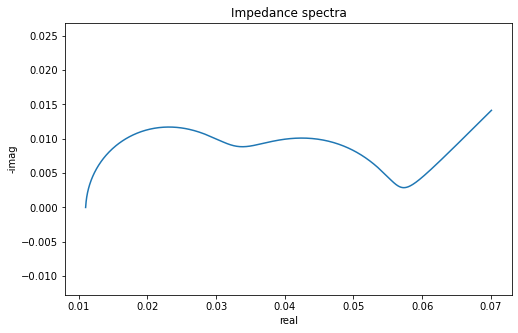

In [83]:
# Plot frequency spectra
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.real(Z), -np.imag(Z))
ax.axis('equal');
ax.set(title='Impedance spectra', xlabel='real', ylabel='-imag');

In [72]:
# Calculate separate impedance components
Z1 = R0 + 1/(1/R1 + (1j*w)*C1)
Z2 = R0 + R1 + 1/(1/R2 + A2*(1j*w)**phi2)
Z3 = R0 + R1 + R2 + 1/(A3*(1j*w)**phi3)

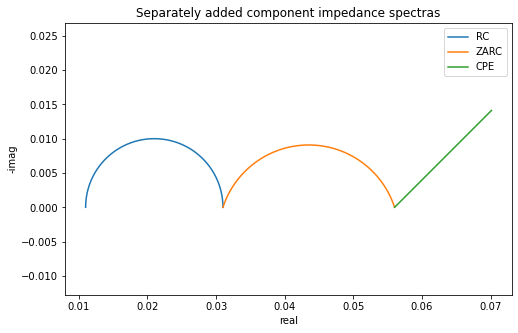

In [86]:
# Plot separate frequency spectra
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.real(Z1), -np.imag(Z1))
ax.plot(np.real(Z2), -np.imag(Z2))
ax.plot(np.real(Z3), -np.imag(Z3))
ax.axis('equal');
ax.set(title='Separately added component impedance spectras', xlabel='real', ylabel='-imag');
ax.legend(['RC', 'ZARC', 'CPE']);

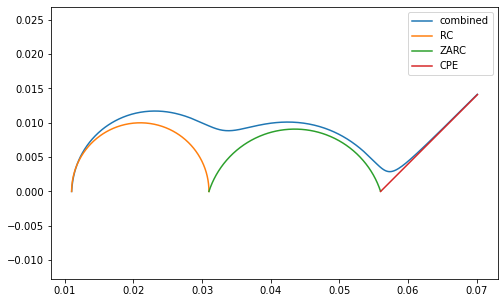

In [88]:
# Compare separate spectras with combined impedance spectra
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.real(Z), -np.imag(Z))
ax.plot(np.real(Z1), -np.imag(Z1))
ax.plot(np.real(Z2), -np.imag(Z2))
ax.plot(np.real(Z3), -np.imag(Z3))
ax.axis('equal');
ax.legend(['combined', 'RC', 'ZARC', 'CPE']);

<IPython.core.display.Javascript object>


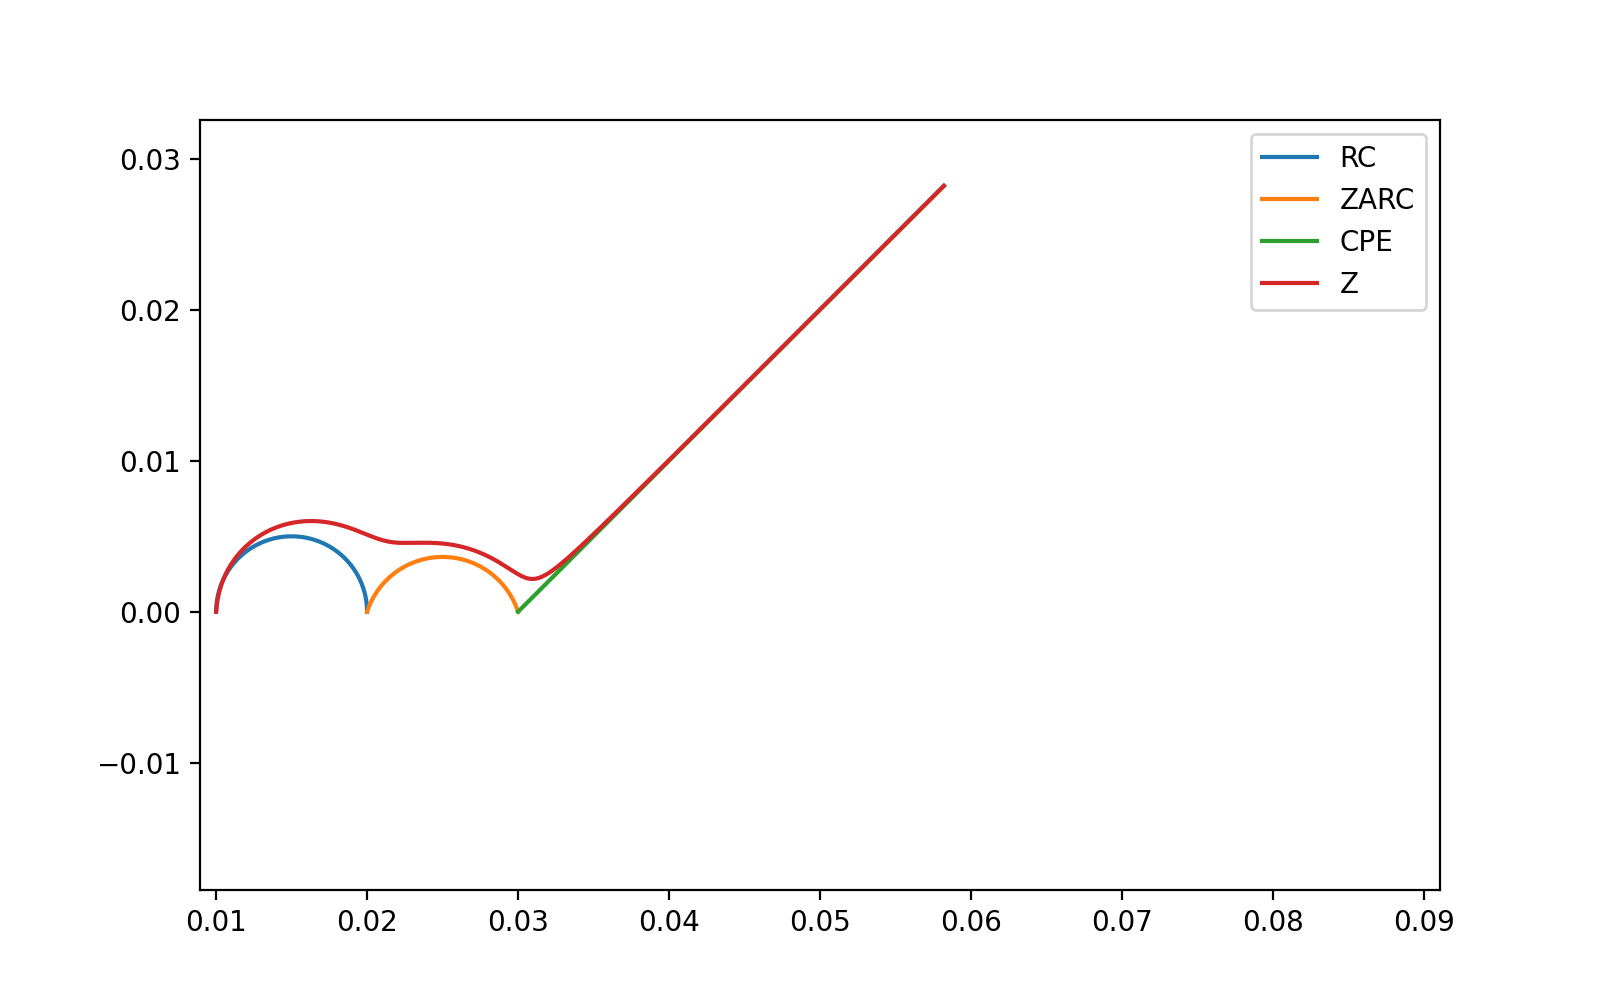

interactive(children=(FloatSlider(value=0.01, description='R0', max=0.1, min=0.001, readout_format='.3f', step…

In [157]:
# Interactive plot
from ipywidgets import widgets
%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,5))
RC, = ax.plot(np.real(R0 + 1/(1/R1 + (1j*w)*C1)),
              -np.imag(R0 + 1/(1/R1 + (1j*w)*C1)))
ZARC, = ax.plot(np.real(R0 + R1 + 1/(1/R2 + A2*(1j*w)**phi2)),
                -np.imag(R0 + R1 + 1/(1/R2 + A2*(1j*w)**phi2)))
CPE, = ax.plot(np.real(R0 + R1 + R2 + 1/(A3*(1j*w)**phi3)),
               -np.imag(R0 + R1 + R2 + 1/(A3*(1j*w)**phi3)))
Z, = ax.plot(np.real(R0 + 1/(1/R1 + (1j*w)*C1) + 1/(1/R2 + A2*(1j*w)**phi2) + 1/(A3*(1j*w)**phi3)),
             -np.imag(R0 + 1/(1/R1 + (1j*w)*C1) + 1/(1/R2 + A2*(1j*w)**phi2) + 1/(A3*(1j*w)**phi3)))


def update(R0, R1, C1, R2, A2, phi2, A3, phi3):
    RC.set_xdata(np.real(R0 + 1/(1/R1 + (1j*w)*C1)))
    RC.set_ydata(-np.imag(R0 + 1/(1/R1 + (1j*w)*C1)))
    ZARC.set_xdata(np.real(R0 + R1 + 1/(1/R2 + A2*(1j*w)**phi2)))
    ZARC.set_ydata(-np.imag(R0 + R1 + 1/(1/R2 + A2*(1j*w)**phi2)))
    CPE.set_xdata(np.real(R0 + R1 + R2 + 1/(A3*(1j*w)**phi3)))
    CPE.set_ydata(-np.imag(R0 + R1 + R2 + 1/(A3*(1j*w)**phi3)))
    Z.set_xdata(np.real(R0 + 1/(1/R1 + (1j*w)*C1) + 1/(1/R2 + A2*(1j*w)**phi2) + 1/(A3*(1j*w)**phi3)))
    Z.set_ydata(-np.imag(R0 + 1/(1/R1 + (1j*w)*C1) + 1/(1/R2 + A2*(1j*w)**phi2) + 1/(A3*(1j*w)**phi3)))
    ax.axis('equal')
    ax.set(xlim=[0, 0.1])
    ax.legend(['RC', 'ZARC', 'CPE', 'Z'])
    fig.canvas.draw()
    
    
interact(update,
         R0=widgets.FloatSlider(min=0.001,
                                max=0.1,
                                step=0.001,
                                value=0.01,
                                readout_format='.3f',
                                orientation='horizontal'),
         R1=widgets.FloatSlider(min=0.001,
                                max=0.1,
                                step=0.001,
                                value=0.01,
                                readout_format='.3f',
                                orientation='horizontal'),
         C1=widgets.IntSlider(min=10,
                              max=1000,
                              step=10,
                              value=100,
                              orientation='horizontal'),
         R2=widgets.FloatSlider(min=0.001,
                                max=0.1,
                                step=0.001,
                                value=0.01,
                                readout_format='.3f',
                                orientation='horizontal'),
         A2=widgets.IntSlider(min=10,
                              max=2000,
                              step=10,
                              value=1000,
                              orientation='horizontal'),
         phi2=widgets.FloatSlider(min=0,
                                  max=1,
                                  step=0.05,
                                  value=0.8,
                                  readout_format='.3f',
                                  top=400,
                                  orientation='horizontal'),
         A3=widgets.IntSlider(min=1000,
                              max=20000,
                              step=100,
                              value=10000,
                              orientation='horizontal'),
         phi3=widgets.FloatSlider(min=0,
                                  max=1,
                                  step=0.05,
                                  value=0.5,
                                  readout_format='.3f',
                                  orientation='horizontal',
                                  )
        );

0.011